### Task 2 
- Load the Intel Image dataset  
- Train and test the dataset 
- Create a model using CNN  
- Evaluate the model using confusion matrix.

In [54]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [55]:
dir = 'Data\Intel Image Data\seg_train\seg_train'
train = image_dataset_from_directory(
        dir,
        image_size=(150, 150),
        batch_size=32,
        subset = "training",
        validation_split=0.2,
        seed=42,
)
       
                            

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Smayan Kulkarni\AppData\Local\Temp\ipykernel_16520\262009540.py:1: SyntaxWarning: invalid escape sequence '\I'
  dir = 'Data\Intel Image Data\seg_train\seg_train'


In [56]:
train.as_numpy_iterator().next()[0].shape

(32, 150, 150, 3)

In [57]:
train.as_numpy_iterator().next()[0].shape[0]

32

In [58]:
val = image_dataset_from_directory(
        'Data\Intel Image Data\seg_test\seg_test',
        image_size=(150, 150),
        batch_size=32,
        subset = "validation",
        validation_split=0.2,
        seed=42
)

Found 3000 files belonging to 6 classes.
Using 600 files for validation.


<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Smayan Kulkarni\AppData\Local\Temp\ipykernel_16520\4254388602.py:2: SyntaxWarning: invalid escape sequence '\I'
  'Data\Intel Image Data\seg_test\seg_test',


In [59]:
class_names = train.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
train = train.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(AUTOTUNE)
val = val.prefetch(AUTOTUNE)

In [61]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling

In [63]:
model = Sequential([
    Rescaling(1./255, input_shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dense(128, activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

d:\Study\ML2\Practicals\.venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train, validation_data=val, epochs=10,)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.5839 - loss: 1.0880 - val_accuracy: 0.6033 - val_loss: 1.2160
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.6786 - loss: 0.8669 - val_accuracy: 0.7083 - val_loss: 0.8654
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.7137 - loss: 0.7806 - val_accuracy: 0.7033 - val_loss: 0.8130
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.7359 - loss: 0.7327 - val_accuracy: 0.7317 - val_loss: 0.7919
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.7509 - loss: 0.6814 - val_accuracy: 0.7233 - val_loss: 0.8038
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.7557 - loss: 0.6656 - val_accuracy: 0.7500 - val_loss: 0.7062
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.7763 - loss: 0.6281 - val_accuracy: 0.7633 - val_loss: 0.6958
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7813 - loss: 0.6043 - 

In [66]:
preds = model.predict(val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


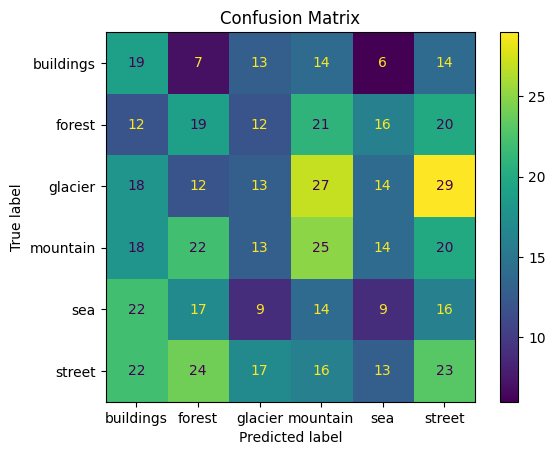

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

true_labels = np.concatenate([y for x, y in val], axis=0)

predicted_labels = np.argmax(preds, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(
)
plt.title('Confusion Matrix')
plt.show()